In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uplaoded=files.upload()

Saving FertilizerData_Processing.csv to FertilizerData_Processing.csv


In [3]:
import pandas as pd
fertilizer_data_path ='FertilizerData_Processing.csv'
merge_fert=pd.read_csv(fertilizer_data_path)

In [4]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,3,maize,80,40,20,5.5
2,12,kidneybeans,20,60,20,5.5
3,18,blackgram,40,60,20,5.0
4,60,pomegranate,20,10,40,5.5


In [5]:
del merge_fert['Unnamed: 0']

In [6]:
merge_fert.describe()

,N,P,K,pH
count,17.000000,17.000000,17.000000,17.000000
mean,58.235294,43.823529,52.941176,5.382353
std,37.788109,36.764853,56.763182,0.673828
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,10.000000,20.000000,5.000000
50%,50.000000,40.000000,40.000000,5.500000
75%,100.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [7]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'kidneybeans', 'blackgram', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

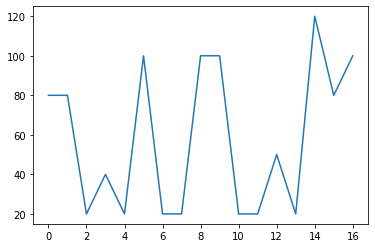

In [8]:
plt.plot(merge_fert["N"])

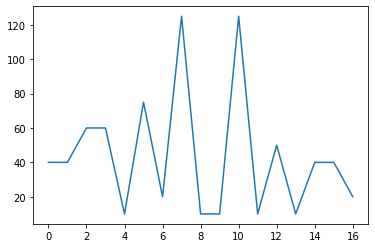

In [9]:
plt.plot(merge_fert["P"])

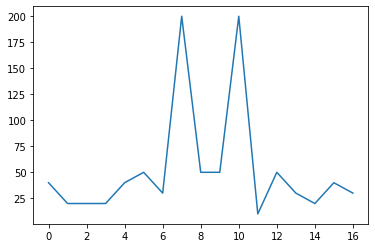

In [10]:
plt.plot(merge_fert["K"])

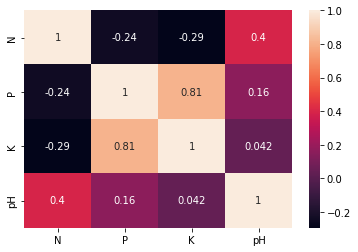

In [11]:
sns.heatmap(merge_fert.corr(),annot=True)

In [12]:
from google.colab import files
uplaoded=files.upload()

Saving CropData_Processing.csv to CropData_Processing.csv


In [16]:
import pandas as pd
crop_data_path='CropData_Processing.csv'
merge_crop = pd.read_csv(crop_data_path)


In [17]:
#Add +/-3 for every NPK value
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    #print(crop)
    N = merge_fert[merge_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = merge_fert[merge_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = merge_fert[merge_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = temp.append(d,ignore_index = True)

In [18]:
temp

,N,P,K
0,69,39,38
1,64,40,36
2,100,60,45
3,77,50,39
4,90,36,37
...,...,...,...
1695,115,17,35
1696,113,38,29
1697,88,19,25
1698,90,38,35


In [19]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']
merge_crop

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall,label
0,0,69,39,38,20.879744,82.002744,6.502985,202.935536,rice
1,1,64,40,36,21.770462,80.319644,7.038096,226.655537,rice
2,2,100,60,45,23.004459,82.320763,7.840207,263.964248,rice
3,3,77,50,39,26.491096,80.158363,6.980401,242.864034,rice
4,4,90,36,37,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...,...
1695,2195,115,17,35,26.774637,66.413269,6.780064,177.774507,coffee
1696,2196,113,38,29,27.417112,56.636362,6.086922,127.924610,coffee
1697,2197,88,19,25,24.131797,67.225123,6.362608,173.322839,coffee
1698,2198,90,38,35,26.272418,52.127394,6.758793,127.175293,coffee


In [20]:
del merge_crop['Unnamed: 0']

In [21]:
merge_crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,69,39,38,20.879744,82.002744,6.502985,202.935536,rice
1,64,40,36,21.770462,80.319644,7.038096,226.655537,rice
2,100,60,45,23.004459,82.320763,7.840207,263.964248,rice
3,77,50,39,26.491096,80.158363,6.980401,242.864034,rice
4,90,36,37,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1695,115,17,35,26.774637,66.413269,6.780064,177.774507,coffee
1696,113,38,29,27.417112,56.636362,6.086922,127.924610,coffee
1697,88,19,25,24.131797,67.225123,6.362608,173.322839,coffee
1698,90,38,35,26.272418,52.127394,6.758793,127.175293,coffee


In [22]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [24]:
from google.colab import files
merge_crop.to_csv('crop_recommendation_final.csv',index=False) 
files.download('crop_recommendation_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
merge_crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,69,39,38,20.879744,82.002744,6.502985,202.935536,rice
1,64,40,36,21.770462,80.319644,7.038096,226.655537,rice
2,100,60,45,23.004459,82.320763,7.840207,263.964248,rice
3,77,50,39,26.491096,80.158363,6.980401,242.864034,rice
4,90,36,37,20.130175,81.604873,7.628473,262.717340,rice


In [26]:
merge_crop.shape

(1700, 8)